In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isnull().values.any()

False

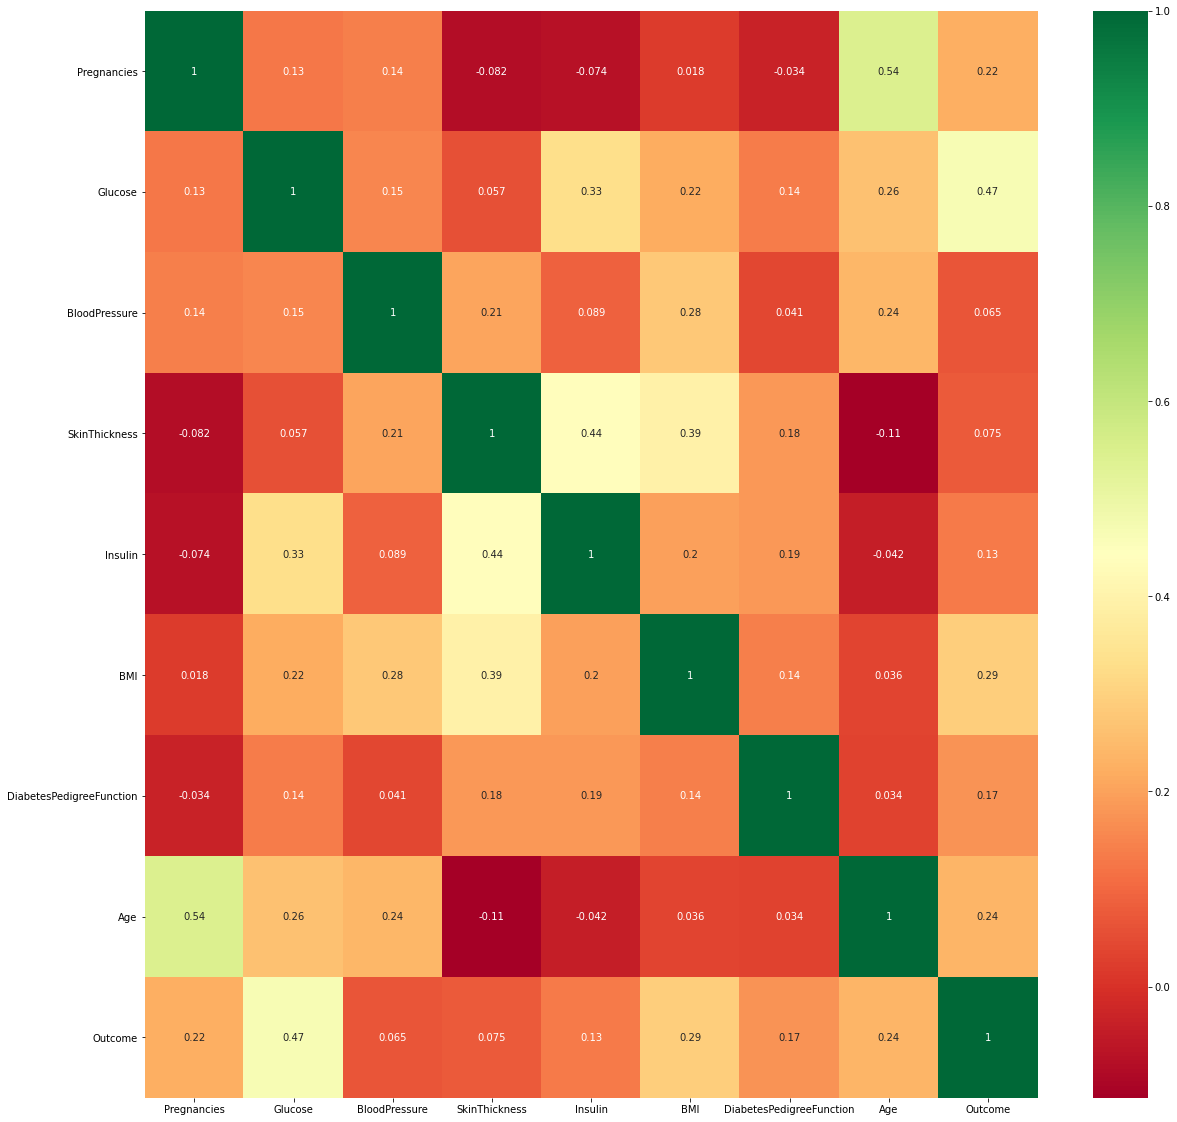

In [7]:
#correlation 
import seaborn as sns
import matplotlib.pyplot as plt
# get correlations of each features in dataset
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
# plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
diabetes_true_count=len(df.loc[df['Outcome']==True])

print(diabetes_true_count)          

268


In [10]:
diabetes_false_count=len(df.loc[df['Outcome']==False])
print(diabetes_false_count)

500


<AxesSubplot:xlabel='Outcome', ylabel='count'>

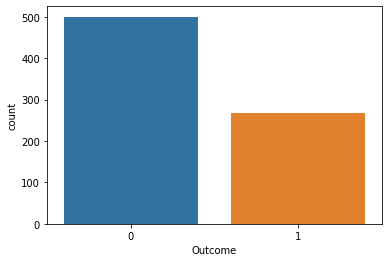

In [11]:
# Outcome countplot
sns.countplot(x = 'Outcome',data = df)


In [12]:
print("total no of rows: {0}".format(len(df)))
print("number of rows missing Glucose : {0}".format(len(df.loc[df['Glucose']==0])))
print("number of rows missing BloodPressure : {0}".format(len(df.loc[df['BloodPressure']==0])))
print("number of rows missing SkinThickness: {0}".format(len(df.loc[df['SkinThickness']==0])))
print("number of rows missing Insuline : {0}".format(len(df.loc[df['Insulin']==0])))
print("number of rows missing BMI : {0}".format(len(df.loc[df['BMI']==0])))
print("number of rows missing DiabetesPedigreeFunction : {0}".format(len(df.loc[df['DiabetesPedigreeFunction']==0])))
print("number of rows missing Age  : {0} ".format(len(df.loc[df['Age']==0])))

total no of rows: 768
number of rows missing Glucose : 5
number of rows missing BloodPressure : 35
number of rows missing SkinThickness: 227
number of rows missing Insuline : 374
number of rows missing BMI : 11
number of rows missing DiabetesPedigreeFunction : 0
number of rows missing Age  : 0 


In [13]:
 
# Replacing zero values with NaN
df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [14]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
# Replacing NaN with mean values
df["Glucose"].fillna(df["Glucose"].mean(), inplace = True)
df["BloodPressure"].fillna(df["BloodPressure"].mean(), inplace = True)
df["SkinThickness"].fillna(df["SkinThickness"].mean(), inplace = True)
df["Insulin"].fillna(df["Insulin"].mean(), inplace = True)
df["BMI"].fillna(df["BMI"].mean(), inplace = True)

In [16]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
X_train

array([[-0.52639686, -1.25828206,  0.01321033, ...,  0.01501323,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.32735374,  0.8068672 , ..., -0.59935041,
         2.41502991,  1.48710085],
       [-0.82846011,  0.57032714, -2.17095414, ..., -0.52719904,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.69307558,  1.13773624, ...,  1.91151712,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.63682202,  0.01321033, ...,  1.44974838,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.10486298,  1.96490883, ..., -1.42187598,
        -0.61552223, -1.03594038]])

In [20]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [21]:
df.isnull().values.any()

False

In [22]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [23]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)
Y_train shape: (614,)
Y_test shape: (154,)


In [24]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


In [25]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

# choosing the K value
# using the elbow method to pic a good K  value

Text(0, 0.5, 'error Rate')

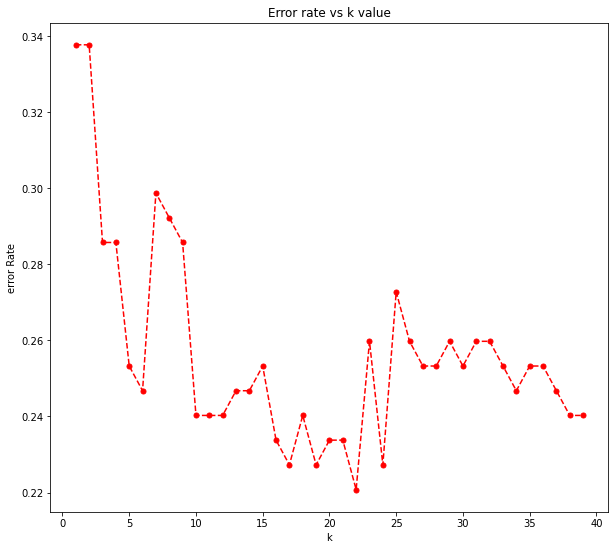

In [26]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    ypredknn = knn.predict(X_test)
    error_rate.append(np.mean(ypredknn != y_test))

plt.figure(figsize=(10,9))
plt.plot(range(1,40),error_rate,color='red', marker='o',linestyle='dashed', markersize=5)
plt.title('Error rate vs k value')
plt.xlabel('k')
plt.ylabel('error Rate')

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =27, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [29]:
ypredknn=knn.predict(X_test)

In [30]:
cm = confusion_matrix(y_test, ypredknn)
print(cm)
accuracy_score(y_test, ypredknn)

[[82 17]
 [22 33]]


0.7467532467532467

In [31]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [32]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [33]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [34]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [35]:
# Making predictions on test dataset
y_pred_logreg = logreg.predict(X_test)
ypredknn = knn.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_dectree = dectree.predict(X_test)
y_pred_ranfor = ranfor.predict(X_test)

In [36]:

# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_knn = accuracy_score(y_test, ypredknn)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_dectree = accuracy_score(y_test, y_pred_dectree)
accuracy_ranfor = accuracy_score(y_test, y_pred_ranfor)

In [37]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 75.32467532467533
K Nearest neighbors: 74.67532467532467
Support Vector Classifier: 75.32467532467533
Naive Bayes: 74.67532467532467
Decision tree: 74.02597402597402
Random Forest: 79.22077922077922


In [38]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_ranfor)
cm

array([[81, 18],
       [14, 41]], dtype=int64)

<AxesSubplot:>

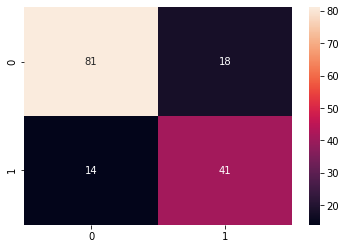

In [39]:

# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [40]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_ranfor))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        99
           1       0.69      0.75      0.72        55

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.78       154
weighted avg       0.80      0.79      0.79       154



In [45]:
print(ranfor.predict(sc.transform([[1,85,66,29,155.548223,26.6,0.351,31]])))

[0]


In [46]:
import pickle
file=open('diabetes_prediction_model.pkl','wb')
pickle.dump(ranfor,file)